In [9]:
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [10]:
derma_ds = pd.read_csv('C:/Users/welcome/Desktop/ML/Mod4/dermatology.data',header=None)
derma_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
0     366 non-null int64
1     366 non-null int64
2     366 non-null int64
3     366 non-null int64
4     366 non-null int64
5     366 non-null int64
6     366 non-null int64
7     366 non-null int64
8     366 non-null int64
9     366 non-null int64
10    366 non-null int64
11    366 non-null int64
12    366 non-null int64
13    366 non-null int64
14    366 non-null int64
15    366 non-null int64
16    366 non-null int64
17    366 non-null int64
18    366 non-null int64
19    366 non-null int64
20    366 non-null int64
21    366 non-null int64
22    366 non-null int64
23    366 non-null int64
24    366 non-null int64
25    366 non-null int64
26    366 non-null int64
27    366 non-null int64
28    366 non-null int64
29    366 non-null int64
30    366 non-null int64
31    366 non-null int64
32    366 non-null int64
33    366 non-null object
34    366 non-null int64
dtypes: int64(34), 

In [11]:
derma_ds[33] = pd.to_numeric(derma_ds[33], errors='coerce').fillna(0).astype(int)
derma_ds[33] = derma_ds[33].replace(to_replace=0,value=int(derma_ds[33].mean()))

In [12]:
#Spilitting the DATA
x = derma_ds.iloc[:, 0:34].values
y = derma_ds.iloc[:,34].values
print(x,y)

[[ 2  2  0 ...  1  0 55]
 [ 3  3  3 ...  1  0  8]
 [ 2  1  2 ...  2  3 26]
 ...
 [ 3  2  2 ...  2  3 28]
 [ 2  1  3 ...  2  3 50]
 [ 3  2  2 ...  3  0 35]] [2 1 3 1 3 2 5 3 4 4 1 2 2 1 3 4 2 1 3 5 6 2 5 3 5 1 6 5 2 3 1 2 1 1 4 2 3
 2 3 1 2 4 1 2 5 3 4 6 2 3 3 4 1 1 5 1 2 3 4 2 6 1 5 1 2 3 1 4 5 1 2 6 3 5
 4 2 2 1 3 5 1 2 2 2 5 1 1 3 1 4 2 2 5 1 3 4 2 5 1 6 2 5 1 2 2 1 4 1 3 1 1
 3 5 3 3 5 2 3 4 1 2 5 6 1 1 2 6 3 5 4 1 1 3 5 5 1 4 2 3 1 2 1 1 3 3 3 2 5
 4 2 2 1 1 1 5 3 2 3 2 2 4 2 3 6 2 1 1 3 4 3 3 1 1 1 3 1 1 2 3 3 1 1 1 1 6
 2 2 2 2 1 3 3 3 1 1 2 3 2 2 2 5 5 5 5 5 1 1 1 1 1 1 1 3 3 3 3 3 3 4 4 4 4
 5 5 5 5 5 5 5 2 2 2 2 1 1 1 1 1 1 6 6 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 4 4 4
 4 4 4 5 5 5 5 6 6 6 4 4 4 1 1 1 1 1 2 2 4 4 4 1 1 2 2 2 3 3 3 3 1 1 1 1 5
 5 5 5 5 3 3 3 4 1 1 4 4 4 1 1 1 3 3 3 3 3 1 1 1 1 4 4 1 1 4 3 3 4 1 1 4 4
 5 5 1 1 5 5 3 1 5 5 6 6 4 4 6 6 6 1 1 1 5 5 1 1 1 1 2 2 4 4 3 3 1]


In [13]:
#Standardize the Data
#x = StandardScaler().fit_transform(x)
x

array([[ 2,  2,  0, ...,  1,  0, 55],
       [ 3,  3,  3, ...,  1,  0,  8],
       [ 2,  1,  2, ...,  2,  3, 26],
       ...,
       [ 3,  2,  2, ...,  2,  3, 28],
       [ 2,  1,  3, ...,  2,  3, 50],
       [ 3,  2,  2, ...,  3,  0, 35]], dtype=int64)

In [25]:
#PCA feature extraction
for n_components in range(2,34):
    pca = PCA(n_components)
    principalComponents = pca.fit_transform(x)
    print(sum(pca.explained_variance_ratio_))
    if(sum(pca.explained_variance_ratio_) > 0.99):
        break;
    #Df = pd.DataFrame(data = principalComponents,columns = ['PC1', 'PC2'])
    #finalDf = pd.concat([Df,pd.DataFrame(y,columns=['Target'])], axis = 1)
    #finalDf
    data = principalComponents
print("no. of principal components :" ,n_components)
#data

0.9374798887008295
0.9551352512297208
0.9624976503553816
0.9669840329623194
0.970580282874121
0.9737351670318516
0.9765164423848657
0.9789278636478594
0.9810752547689463
0.9831514665672595
0.9850513040898269
0.986710140968304
0.9882646796421312
0.9896924820056909
0.9908531581459209
no. of principal components : 16


In [28]:

 pca = PCA(n_components)
principalComponents = pca.fit_transform(x)
print(pca.explained_variance_ratio_)
print("Variance retained = ",sum(pca.explained_variance_ratio_))

[0.90353521 0.03394468 0.01765536 0.0073624  0.00448638 0.00359625
 0.00315488 0.00278128 0.00241142 0.00214739 0.00207621 0.00189984
 0.00165884 0.00155454 0.0014278  0.00116068]
Variance retained =  0.9908531581459209


Text(0, 0.5, 'PC2')

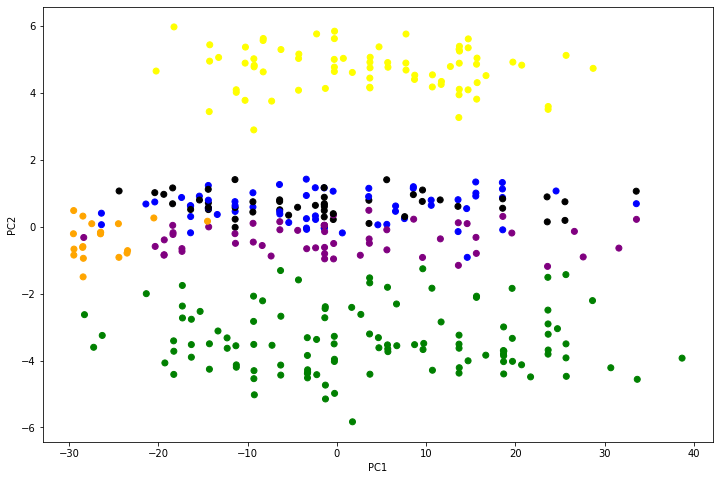

In [99]:
plt.figure(figsize=(12,8))
colors = np.array(['red', 'green', 'blue','yellow','black','purple','orange'])
plt.scatter(finalDf['PC1'], finalDf['PC2'], c=colors[finalDf['Target']])
plt.xlabel('PC1')
plt.ylabel('PC2')